<a href="https://colab.research.google.com/github/nguyenvudev20/mse22.python4engineer/blob/main/Bai_2_m5-eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BÀI 2: Tìm hiểu  M5 EDA**

nguồn: [Kaggle](https://www.kaggle.com/code/akshaychaudhary44/m5-eda)

# Giới thiệu

Sử dụng dữ liệu ở **M5-Forecasting** để tiến hành vẻ các đồ thị

# Mục tiêu bài tập


*   Tìm hiểu các loại biểu đồ
*   Kết hợp với dữ liệu M5-Forecasting để biểu diễn



# Cài đặt thư viện hổ trợ chưa có trên colab

In [1]:
#dùng pip cài đặt thư viện kaggle để kết nối và tải dữ liệu về Olab
!pip install -q kaggle 

In [2]:
!pip3 install scipy==1.2.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 1.6 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 4.1.4 requires scipy>=1.4.1, but you have scipy 1.2.1 which is incompatible.
plotnine 0.8.0 requires scipy>=1.5.0, but you have scipy 1.2.1 which is incompatible.
jaxlib 0.3.22+cuda11.cudnn805 requires scipy>=1.5, but you have scipy 1.2.1 which is incompatible.
jax 0.3.23 requires scipy>=1.5, but you have scipy 1.2.1 which is incompatible.
aeppl 0.0.33 requires scipy>=1.4.0, but you have scipy 1.2.1 which is incompatible.


# Thêm các thư viện hổ trợ cơ bản

In [61]:
# TRong bài sử dụng Python 3 và các thư viện liên quan

# thêm các thư viện
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.patches import Polygon
import seaborn as sns
import datetime

# Liên kết với Kaggle để tải các data csv

In [4]:
# tạo các tham số môi trường cho api kaggle để kết nối tải file 
os.environ['KAGGLE_USERNAME'] = "vunguyen2020"
os.environ['KAGGLE_KEY'] = "ceaa092a89951b4d01485d4ee50cf382"

!kaggle competitions download -c m5-forecasting-accuracy #tải gói data cho bài tutorial từ kaggle dưới dạng zip file
!mkdir kaggle #tạo folder để unzip file vừa tải
!unzip /content/m5-forecasting-accuracy.zip -d kaggle #tiến hành unzip vào folder kaggle

 68% 31.0M/45.8M [00:00<00:00, 171MB/s] 
100% 45.8M/45.8M [00:00<00:00, 169MB/s]
Archive:  /content/m5-forecasting-accuracy.zip
  inflating: kaggle/calendar.csv     
  inflating: kaggle/sales_train_evaluation.csv  
  inflating: kaggle/sales_train_validation.csv  
  inflating: kaggle/sample_submission.csv  
  inflating: kaggle/sell_prices.csv  


# Lấy dữ liệu vừa tải 

In [5]:
sale2 = pd.read_csv('kaggle/sales_train_validation.csv')
cale4 = pd.read_csv('kaggle/calendar.csv')
prices = pd.read_csv("kaggle/sell_prices.csv")

# **Renaming column names of training set**
from d_* to corresponding Dates

In [6]:
sale2.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [7]:

x = datetime.date(2011,1,29)
for c in ((sale2.columns)[6:]):
    sale2.rename(columns={c:x},inplace=True)
    x = x + datetime.timedelta(days=1)

In [8]:
sale2.head(10)

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4
5,HOBBIES_1_006_CA_1_validation,HOBBIES_1_006,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,0,1,0,0,0,2,0,0
6,HOBBIES_1_007_CA_1_validation,HOBBIES_1_007,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,1,0,1,0,0,1,1
7,HOBBIES_1_008_CA_1_validation,HOBBIES_1_008,HOBBIES_1,HOBBIES,CA_1,CA,12,15,0,0,...,0,0,1,37,3,4,6,3,2,1
8,HOBBIES_1_009_CA_1_validation,HOBBIES_1_009,HOBBIES_1,HOBBIES,CA_1,CA,2,0,7,3,...,0,0,1,1,6,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,HOBBIES_1_010,HOBBIES_1,HOBBIES,CA_1,CA,0,0,1,0,...,1,0,0,0,0,0,0,2,0,2


In [9]:
X = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()
X.sum()

2011-01-29    32631
2011-01-30    31749
2011-01-31    23783
2011-02-01    25412
2011-02-02    19146
              ...  
2016-04-20    35343
2016-04-21    35033
2016-04-22    40517
2016-04-23    48962
2016-04-24    49795
Length: 1913, dtype: int64

# **1.Sales of first 5 items as time series**

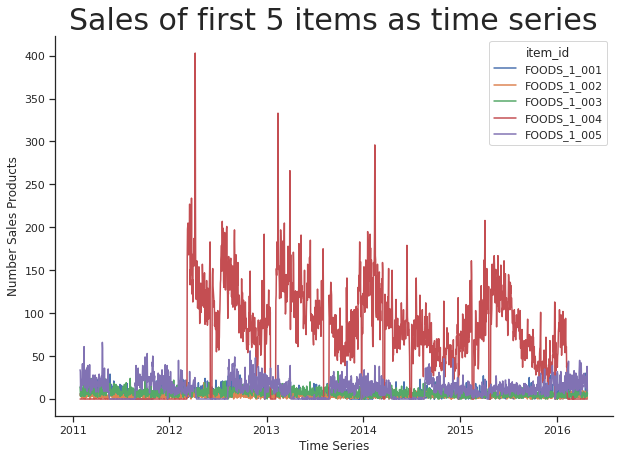

In [73]:

X = sale2.groupby('item_id')[(sale2.columns)[6:]].sum()

# viết lại
df=X[:5].T
df.plot(figsize=(10, 7))
plt.title('Sales of first 5 items as time series',fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Number Sales Products')
plt.show()

# code cũ
#plt.figure(num=None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
#for i in range(5):
#    plt.plot(X.iloc[i,:],label=X.index[i])
#    plt.legend(loc='best')
#plt.show()

# **2.Total sales as time series**

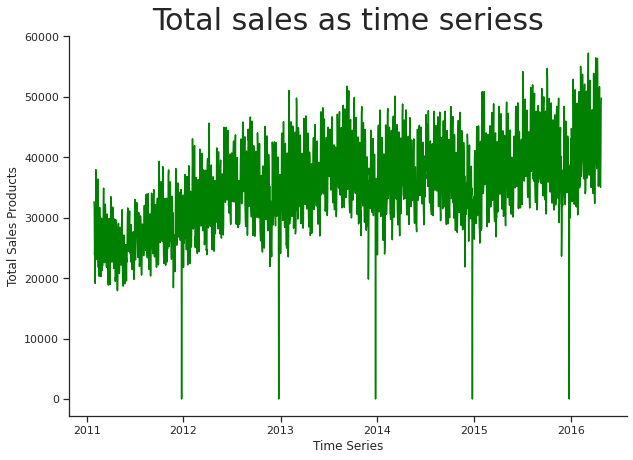

In [74]:
# viết lại
X.sum().plot(figsize=(10, 7),color=['green'])
plt.title('Total sales as time seriess',fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Total Sales Products')
plt.show()

# code cũ
#plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
#(X.sum()).plot()
#plt.show()

# **3.Monthly sales in different cities**

In [76]:

X = sale2
X = X.groupby(X.columns.map(lambda x : x if type(x) == str else x.strftime('%Y-%m')),axis=1).sum()
for c in ((X.columns)[:-6]):
    x= datetime.datetime.strptime(c, '%Y-%m').date()
    X.rename(columns={c:x},inplace=True)

X

,2011-01-01,2011-02-01,2011-03-01,2011-04-01,2011-05-01,2011-06-01,2011-07-01,2011-08-01,2011-09-01,2011-10-01,...,2016-01-01,2016-02-01,2016-03-01,2016-04-01,cat_id,dept_id,id,item_id,state_id,store_id
0,0,0,0,0,0,0,0,0,0,0,...,24,29,29,26,HOBBIES,HOBBIES_1,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,CA,CA_1
1,0,0,0,0,0,3,5,10,7,8,...,4,5,10,1,HOBBIES,HOBBIES_1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,CA,CA_1
2,0,0,0,0,0,0,0,0,0,0,...,6,9,15,16,HOBBIES,HOBBIES_1,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,CA,CA_1
3,0,0,17,23,34,28,60,55,53,55,...,64,60,53,51,HOBBIES,HOBBIES_1,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,CA,CA_1
4,0,0,0,0,31,31,5,36,67,26,...,22,33,39,29,HOBBIES,HOBBIES_1,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,CA,CA_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,2,86,127,94,55,30,27,20,27,29,...,24,21,7,6,FOODS,FOODS_3,FOODS_3_823_WI_3_validation,FOODS_3_823,WI,WI_3
30486,0,32,41,29,19,12,37,24,22,21,...,0,0,0,9,FOODS,FOODS_3,FOODS_3_824_WI_3_validation,FOODS_3_824,WI,WI_3
30487,6,131,85,40,29,32,41,0,2,39,...,24,19,35,24,FOODS,FOODS_3,FOODS_3_825_WI_3_validation,FOODS_3_825,WI,WI_3
30488,0,0,0,0,0,0,0,0,0,0,...,47,27,36,23,FOODS,FOODS_3,FOODS_3_826_WI_3_validation,FOODS_3_826,WI,WI_3


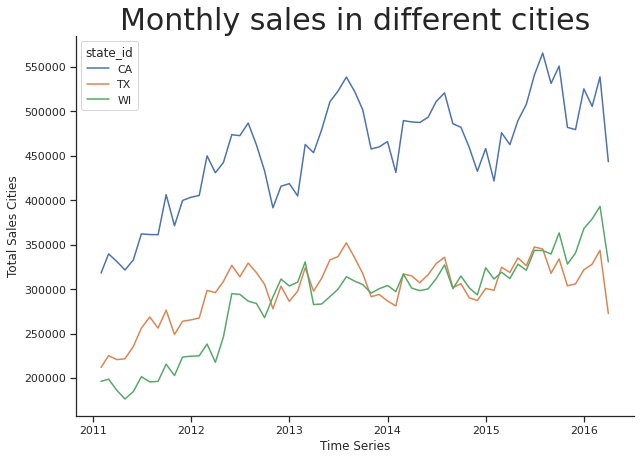

In [77]:
F = X.groupby(['state_id'])[(X.columns)[:-6]].sum()
# viết lại
F.T[1:].plot(figsize=(10, 7)) # chỉ lấy từ cộ số 1 vì cột 0 số liệu thấp quá
plt.title('Monthly sales in different cities', fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Total Sales Cities')
plt.show()



#code cũ
#plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
#for i in range(3):
#    plt.plot(F.iloc[i,1:-1],label=F.index[i])
#    plt.legend(loc='best')
#plt.show()

# **4.Monthly sales of different categories**

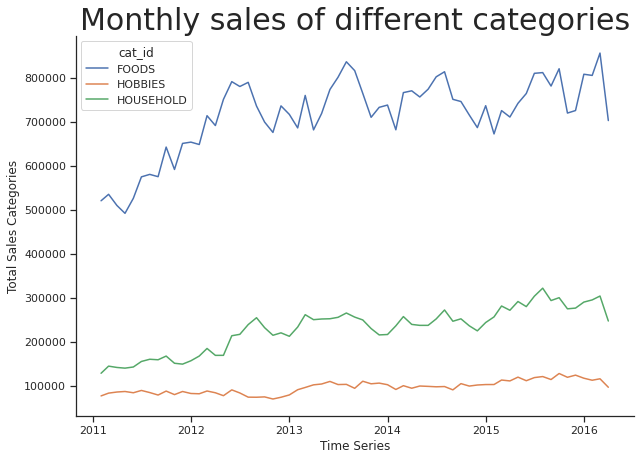

In [78]:
F = X.groupby(['cat_id'])[(X.columns)[:-6]].sum()
# viết lại
F.T[1:].plot(figsize=(10, 7))
plt.title('Monthly sales of different categories', fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Total Sales Categories')
plt.show()

# code cũ
#plt.figure(num=None, figsize=(7, 4), dpi=80, facecolor='w', edgecolor='k')
#for i in range(3):
#    plt.plot(F.iloc[i,1:-1],label=F.index[i])
#    plt.legend(loc='best')
#plt.show()


# **5.Total Sales per category**

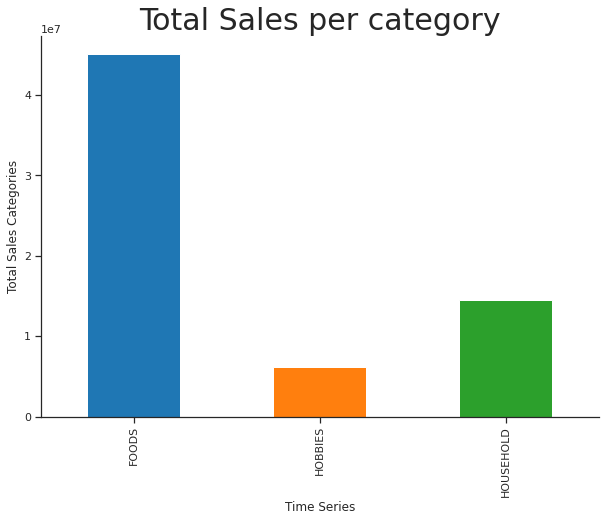

In [79]:
F = X.groupby(['cat_id'])[(X.columns)[:-6]].sum()
#viết lại
cmap = plt.cm.tab10
colors = cmap(np.arange(len(df)) % cmap.N)
F.sum(axis=1).plot.bar(figsize=(10,7),color=colors)
plt.title('Total Sales per category', fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Total Sales Categories')
plt.show()

#code cũ
#plt.figure(num=None, figsize=(5,5), dpi=80, facecolor='w', edgecolor='k')
#(F.sum(axis=1)).plot.bar()
#plt.show()

# **6.Monthly sales in different stores**

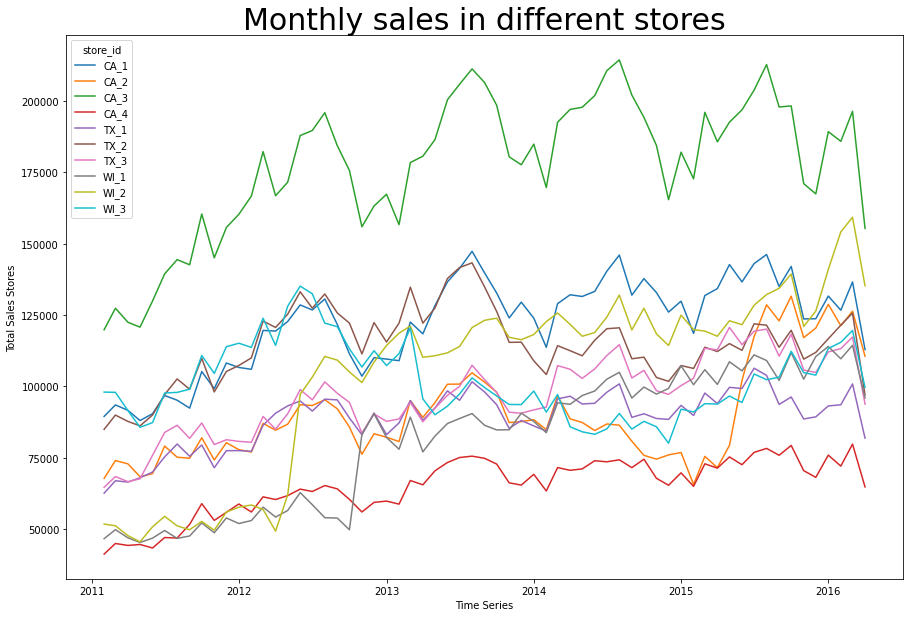

In [16]:
F = X.groupby(['store_id'])[(X.columns)[:-6]].sum()

# viết lại
F.T[1:].plot(figsize = (15,10))
plt.title('Monthly sales in different stores', fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Total Sales Stores')
plt.show()


# code cũ
# fig, ax = plt.subplots(1, 3, sharey=True, figsize = (15,4))
# for i in range(10):
#     n = lambda x : 0 if x == 'C' else (1 if x == 'T' else 2)
#     n = n(F.index[i][0])
#     ax[n].plot(F.iloc[i,1:-1],label=F.index[i])
#     ax[n].grid(b=True,axis='y')
#     ax[n].legend(loc='best')
# fig.subplots_adjust( wspace=0.0)
# plt.show()

# **7.Monthly Sales in Different Departments of three States**

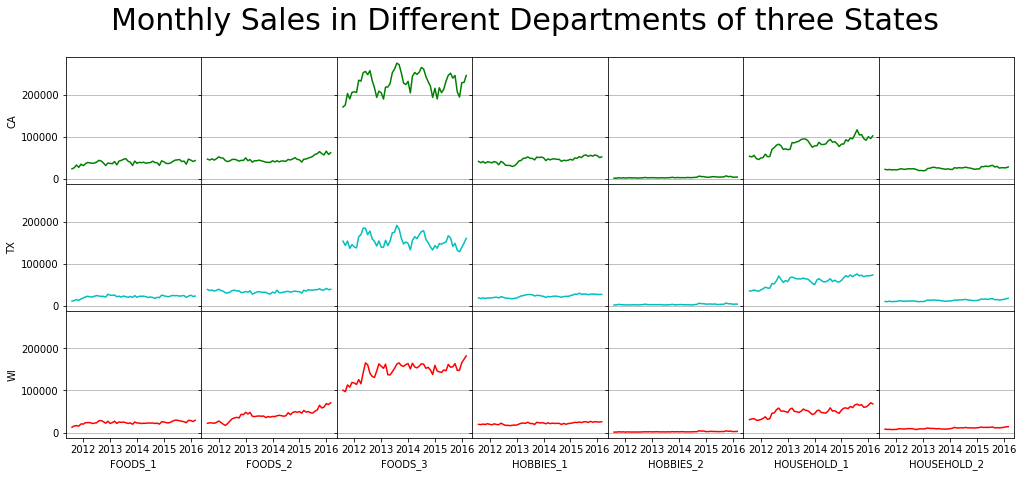

In [17]:
F = X.groupby(['state_id','dept_id'])[(X.columns)[6:]].sum()
fig, ax = plt.subplots(3, 7, sharey=True,sharex=True,figsize = (17,7))
colors=['g','c','r']
for i in range(3):
    for j in range(7):
        k = (7*i)+(j)
        ax[i,j].plot(F.iloc[k,1:-1],color=colors[i])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = F.index[k][1], ylabel = F.index[k][0])
for a in ax.flat:
    a.label_outer()
fig.subplots_adjust( hspace = 0.0,wspace=0.0)
fig.suptitle('Monthly Sales in Different Departments of three States', fontsize=30)

plt.show()


# #code cũ
# fig, ax = plt.subplots(3, 7, sharey=True,sharex=True,figsize = (17,7))
# for i in range(3):
#     for j in range(7):
#         k = (7*i)+(j)
#         ax[i,j].plot(F.iloc[k,1:-1])
#         ax[i,j].grid(b=True,axis='y')
#         ax[i,j].set(xlabel = F.index[k][1], ylabel = F.index[k][0])
# for a in ax.flat:
#     a.label_outer()
# fig.subplots_adjust( hspace = 0.0,wspace=0.0)
# plt.show()

# **8.Total Sales with Smoothing fit**

In [18]:
F = sale2.drop(labels=[datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)],axis=1)

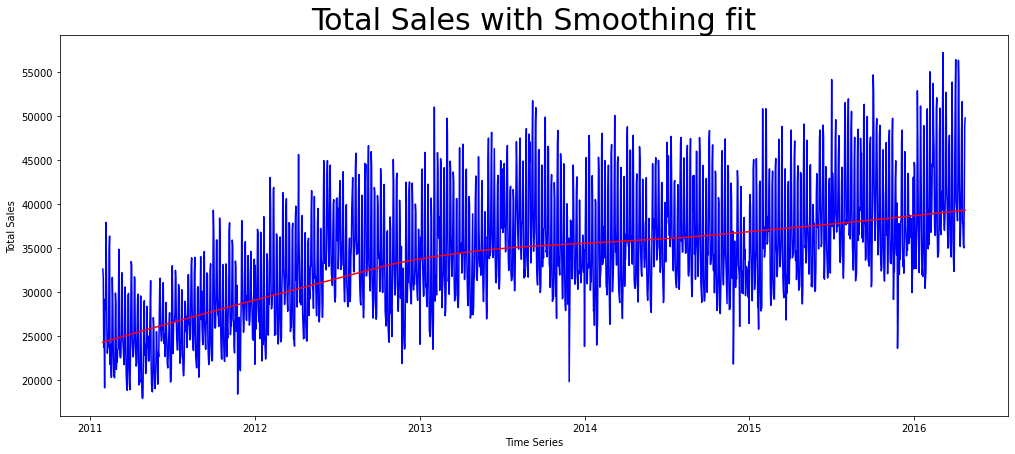

In [19]:
#F
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
S = F.iloc[:,6:].sum()
z = lowess(S.values, range(S.shape[0]))
#viết lại
fig, ax1 = plt.subplots(1, 1, figsize=(17, 7))
plt.plot(S,color='b')
plt.plot(pd.Series(z[:,1],S.index),color='r')
plt.title('Total Sales with Smoothing fit', fontsize=30)
plt.xlabel('Time Series')
plt.ylabel('Total Sales')
plt.show()





#code cu
# plt.plot(S,color='m')
# plt.plot(pd.Series(z[:,1],S.index))



# **9.Seasonality in Residuals**


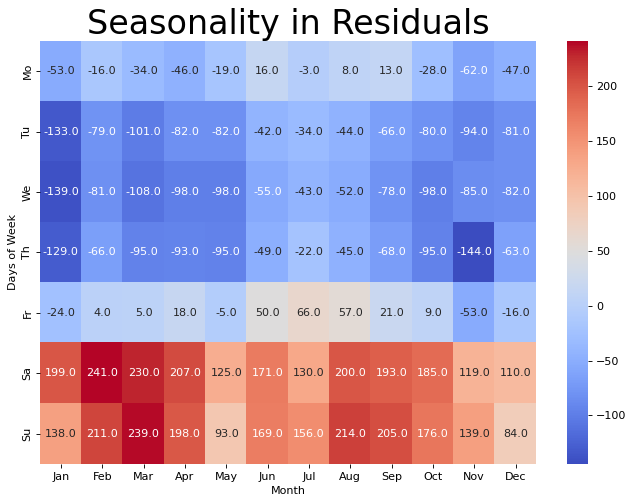

In [20]:
M = F.iloc[:,6:].sum()
z = lowess(M, range(M.shape[0]))
Z = M.values - z[:,1]
A = (pd.DataFrame(data=Z,index=M.index)).T
A = A.groupby(A.columns.map(lambda x : str(x.weekday())+'-'+str(x.month)),axis=1).sum()
H = np.zeros((7,12))
for i in range(7):
    for j in range(12):
        H[i,j] = A[str(i)+'-'+str(j+1)]//1000
        
import seaborn as sns

#viết lại
dayofweek=['Mo', 'Tu', 'We', 'Th', 'Fr','Sa','Su' ]
monthofyear=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(H, annot=True,fmt=".1f",cmap='coolwarm',\
                 xticklabels=monthofyear,\
                 yticklabels=dayofweek)
plt.title('Seasonality in Residuals', fontsize=30)
plt.xlabel('Month')
plt.ylabel('Days of Week')
plt.show()

#code cũ
# plt.figure(None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
# ax = sns.heatmap(H,cmap='coolwarm',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ])
# plt.show()


# **10.Sales per state with seasonalities**

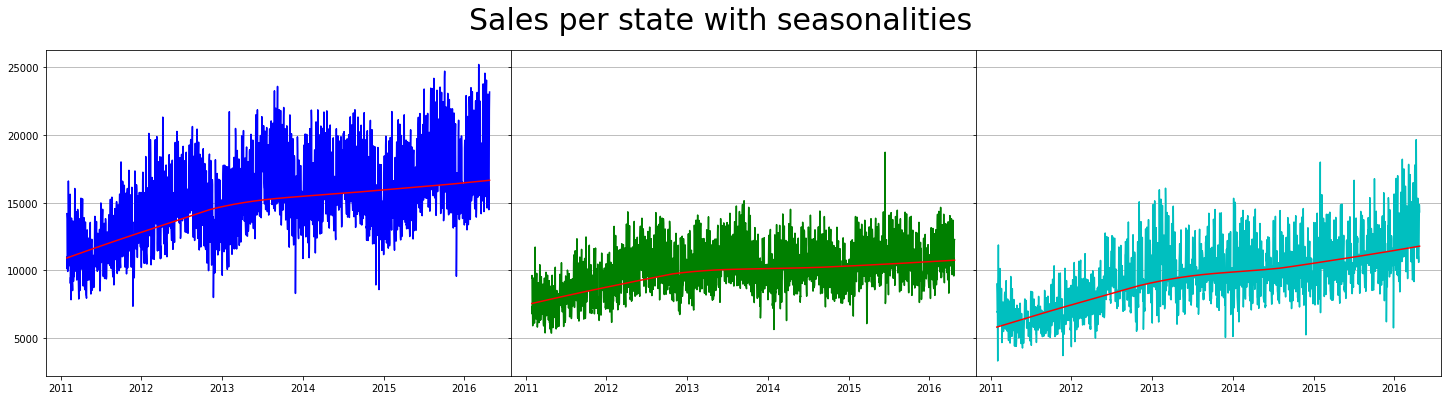

In [21]:

M = F.groupby(['state_id'])[(F.columns)[6:]].sum()

#viết lại
colors=['b','g','c']
fig, ax = plt.subplots(1, 3, sharey=True, figsize = (25,6))
for i in range(3):
    ax[i].plot(M.iloc[i,:],label=M.index[i],color=colors[i])
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    ax[i].plot(pd.Series(z[:,1],M.columns),label=M.index[i],color='r')
    ax[i].grid(b=True,axis='y')
   

fig.subplots_adjust( wspace=0.0)
fig.suptitle('Sales per state with seasonalities', fontsize=30)
plt.show()



#code cũ
# fig, ax = plt.subplots(1, 3, sharey=True, figsize = (25,6))
# for i in range(3):
#     ax[i].plot(M.iloc[i,:],label=M.index[i])
#     z = lowess(M.iloc[i,:].values, range(M.shape[1]))
#     ax[i].plot(pd.Series(z[:,1],M.columns),label=M.index[i])
#     ax[i].grid(b=True,axis='y')
#     ax[i].legend(loc='best')

# fig.subplots_adjust( wspace=0.0)
# plt.show()



# **11.Weekly Seasonality**

In [22]:
mean_sales = F.iloc[:,6:].sum().mean()

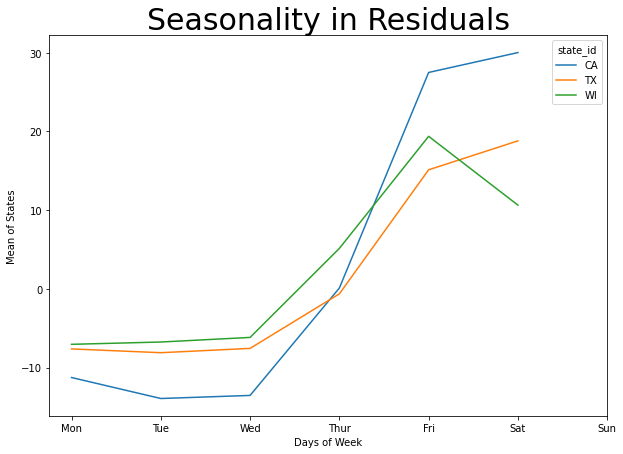

In [23]:

A = M
for i in range(3):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : str(x.weekday())),axis=1).sum()


#viết lại
dayofweek=['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ]
A.T[1:].plot(figsize=(10, 7))
plt.xticks(range(0,7),dayofweek)
plt.title('Seasonality in Residuals', fontsize=30)
plt.xlabel('Days of Week')
plt.ylabel('Mean of States')
plt.show()

#code cũ
# plt.figure(num=None, figsize=(5, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(3):
#     plt.plot(A.iloc[i,:],label=A.index[i])
#     plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
#     plt.legend(loc='best')
# plt.show()

# **12.Monthly Seasonality**

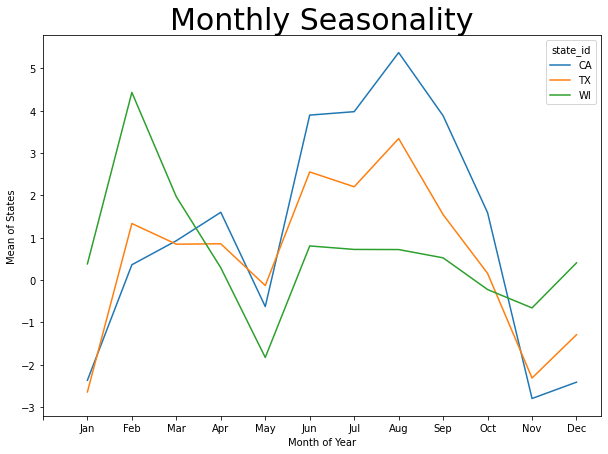

In [24]:
A = M
for i in range(3):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
A = A/mean_sales
A = A.groupby(A.columns.map(lambda x : (x.month)),axis=1).sum()

#viết lại
months=['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
A.T.plot(figsize=(10, 7))
plt.xticks(range(0,13),months)
plt.title('Monthly Seasonality', fontsize=30)
plt.xlabel('Month of Year')
plt.ylabel('Mean of States')
plt.show()



#code cũ
# plt.figure(num=None, figsize=(7,3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(3):
#     plt.plot(A.iloc[i,:],label=A.index[i])
#     plt.legend(loc='best')
#     plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.show()

# **13.Weekly and monthly seasonalities by state and category**

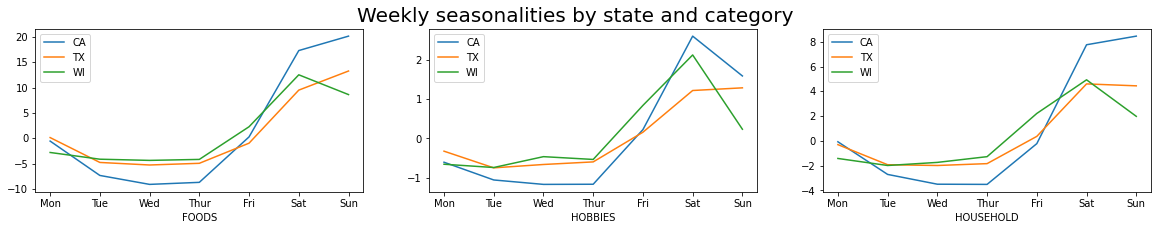

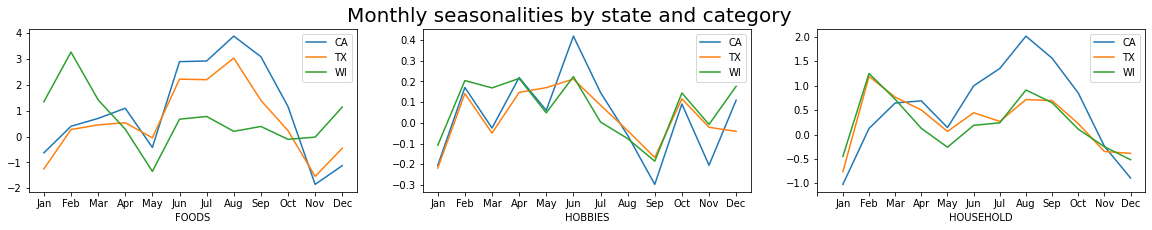

In [25]:
def show_plot_abc(df,xtick,title):
  fig, ax = plt.subplots(1,3,figsize = (20,3),sharex=True)
  for i in range(9):
      ax[(i//3)].plot(df.iloc[i,:],label=df.index[i][1])
      ax[(i//3)].legend(loc='best')
      ax[i//3].set(xlabel = A.index[i][0])
  plt.xticks(range(0,len(xtick)),xtick)
  fig.suptitle(title, fontsize=20)
  plt.show()


M = F.groupby(['cat_id','state_id'])[(F.columns)[6:]].sum()
A = M
for i in range(9):
    z = lowess(M.iloc[i,:].values, range(M.shape[1]))
    A.iloc[i,:] = M.iloc[i,:] - z[:,1]
G = A/mean_sales


# viết lại

weekly=['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ]
monthly=['','Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

A = G.groupby(G.columns.map(lambda x : str(x.weekday())),axis=1).sum() # df nhóm weekly by state and category
B = G.groupby(G.columns.map(lambda x : x.month),axis=1).sum() # df nhóm monthly by state and category
show_plot_abc(A,weekly,'Weekly seasonalities by state and category')
show_plot_abc(B,monthly,'Monthly seasonalities by state and category')




# # code cũ
# A = G.groupby(G.columns.map(lambda x : str(x.weekday())),axis=1).sum()
# fig, ax = plt.subplots(1,3,figsize = (20,3),sharex=True)
# for i in range(9):
#     ax[(i//3)].plot(A.iloc[i,:],label=A.index[i][1])
#     ax[(i//3)].legend(loc='best')
#     ax[i//3].set(xlabel = A.index[i][0])
# plt.xticks(range(0,7),['Mon', 'Tue', 'Wed', 'Thur', 'Fri','Sat','Sun' ])
# plt.show()

# B = G.groupby(G.columns.map(lambda x : x.month),axis=1).sum()
# fig, ax = plt.subplots(1,3,figsize = (20,3), sharex=True)
# for i in range(9):
#     ax[(i//3)].plot(B.iloc[i,:],label=B.index[i][1])
#     ax[(i//3)].legend(loc='best')
#     ax[i//3].set(xlabel = B.index[i][0])
# plt.xticks(range(1,13),['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# plt.show()


# **14.Event vs Non-event days**

In [26]:

#viết lại
data ={'name' :['Non Events','Events'],'value':[cale4.date.count() - cale4.event_name_1.count(),cale4.event_name_1.count()]}
df11=pd.DataFrame(data)

fig = px.pie(df11, values='value', names='name',
            color_discrete_sequence=px.colors.sequential.RdBu,
            width = 750, height=450, title = 'Event vs Non-event days')
fig.update_traces(text = df11['name'], textinfo = 'label+percent',showlegend=False)
fig.show() # hiển thị biểu đồ


#code cũ
#Non_events = cale4.date.count() - cale4.event_name_1.count()
#Events = cale4.event_name_1.count()
# pd.Series([Non_events,Events], ['Non_Events',"Evetns"],name="").plot.pie(autopct='%1.1f%%')
# plt.show()


# **15.Relative number of types of events**

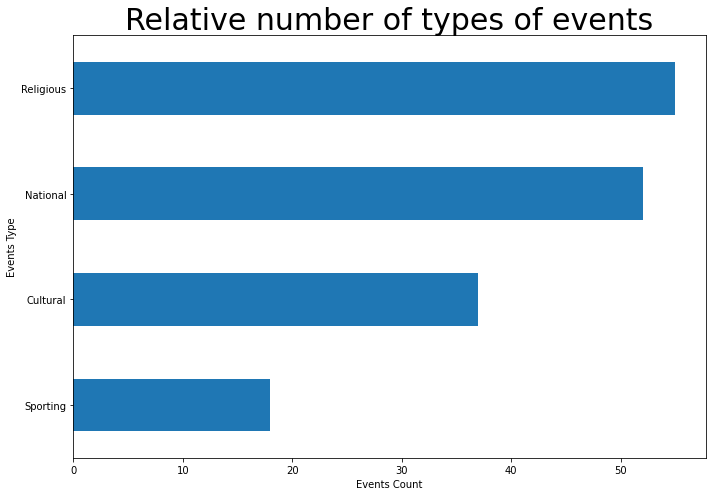

In [27]:
#viết lại
df12=cale4.groupby(['event_type_1']).count().iloc[:,1].sort_values(ascending=True)
fig, ax = plt.subplots(figsize = (10,7))
df12.plot.barh()
plt.title('Relative number of types of events', fontsize=30)
plt.xlabel('Events Count')
plt.ylabel('Events Type')
plt.tight_layout()
plt.show()



#code cũ
# cale4.groupby(['event_type_1']).count().iloc[:,1].sort_values(ascending=True).plot.barh()
# plt.show()

# **16.SNAP days eac month in different states**

In [28]:
idx=pd.date_range('2012-01-01', '2012-12-31')
idx

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04',
               '2012-01-05', '2012-01-06', '2012-01-07', '2012-01-08',
               '2012-01-09', '2012-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [29]:
'''import matplotlib as mpl
import calmap

# Import Data
df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/yahoo.csv", parse_dates=['date'])
df.set_index('date', inplace=True)

# Plot
plt.figure(figsize=(16,10), dpi= 80)
calmap.calendarplot(df['2014']['VIX.Close'], fig_kws={'figsize': (16,10)}, yearlabel_kws={'color':'black', 'fontsize':14}, subplot_kws={'title':'Yahoo Stock Prices'})
plt.show()'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Settings
years = [2013] 
weeks = [1, 2, 3, 4, 5, 6]
days = ['M', 'T', 'W', 'T', 'F', 'S', 'S']
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

def generate_data():
    #idx = pd.date_range('2012-01-01', periods=182, freq='D')
    idx=pd.date_range(str(years[0])+'-01-01', str(years[0])+'-06-30')
    return pd.Series(range(len(idx)), index=idx)


def split_months(df, year):
    """
    Take a df, slice by year, and produce a list of months,
    where each month is a 2D array in the shape of the calendar
    :param df: dataframe or series
    :return: matrix for daily values and numerals
    """
    df = df[df.index.year == year]


    # Empty matrices
    a = np.empty((6, 7))
    a[:] = np.nan

    day_nums = {m:np.copy(a) for m in range(1,7)}  # matrix for day numbers
    day_vals = {m:np.copy(a) for m in range(1,7)}  # matrix for day values

    # Logic to shape datetimes to matrices in calendar layout
    for d in df.iteritems():  # use iterrows if you have a DataFrame

        day = d[0].day
        month = d[0].month
        col = d[0].dayofweek

        if d[0].is_month_start:
            row = 0

        day_nums[month][row, col] = day  # day number (0-31)
        day_vals[month][row, col] = d[1] # day value (the heatmap data)

        if col == 6:
            row += 1

    return day_nums, day_vals


def create_year_calendar(day_nums, day_vals, X, name):
    fig, ax = plt.subplots(1, 6, figsize=(20, 12))

    for i, axs in enumerate(ax.flat):

        axs.imshow(day_vals[i+1], cmap='viridis', vmin=1, vmax=365)  # heatmap
        axs.set_title(month_names[i])

        # Labels
        axs.set_xticks(np.arange(len(days)))
        axs.set_xticklabels(days, fontsize=10, fontweight='bold', color='#555555')
        axs.set_yticklabels([])

        # Tick marks
        axs.tick_params(axis=u'both', which=u'both', length=0)  # remove tick marks
        axs.xaxis.tick_top()

        # Modify tick locations for proper grid placement
        axs.set_xticks(np.arange(-.5, 6, 1), minor=True)
        axs.set_yticks(np.arange(-.5, 6, 1), minor=True)
        axs.grid(which='minor', color='w', linestyle='-', linewidth=2.1)

        # Despine
        for edge in ['left', 'right', 'bottom', 'top']:
            axs.spines[edge].set_color('#FFFFFF')

        # Annotate
        for w in range(len(weeks)):
            for d in range(len(days)):
                day_num = day_nums[i+1][w, d]
                if not np.isnan(day_num):    # Value label
                    axs.text(d, w, f"{day_num:0.0f}",
                             ha="center", va="center",
                             fontsize=15, color="k", alpha=0.8)
                    patch_coords = ((d - 0.5, w - 0.5),
                                    (d - 0.5, w + 0.5),
                                    (d + 0.5, w + 0.5),
                                    (d + 0.5, w - 0.5))
                    if datetime.datetime.strptime(str(years[0])+'-'+str(i+1)+'-'+str(int(day_num)), '%Y-%m-%d').date().strftime('%Y-%m-%d') in X:
                        square = Polygon(patch_coords, fc='#6b72d6')  #FF4500
                        axs.add_artist(square)
                    else:
                        square = Polygon(patch_coords, fc='#DDDDDD')
                        axs.add_artist(square)

    # Final adjustments
    fig.suptitle(name + ' 2013', fontsize=20)
    plt.subplots_adjust(left=0.04, right=0.96, top=1, bottom=0.65)
    plt.show()

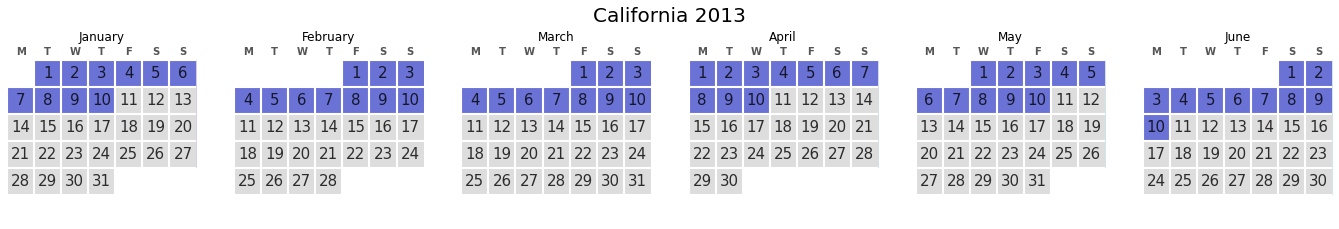

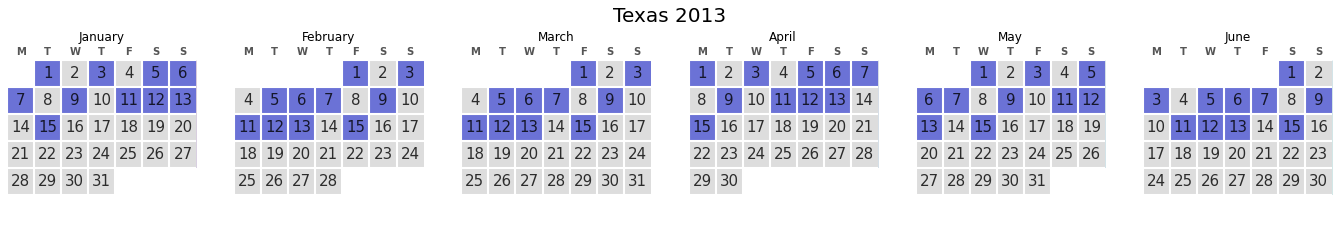

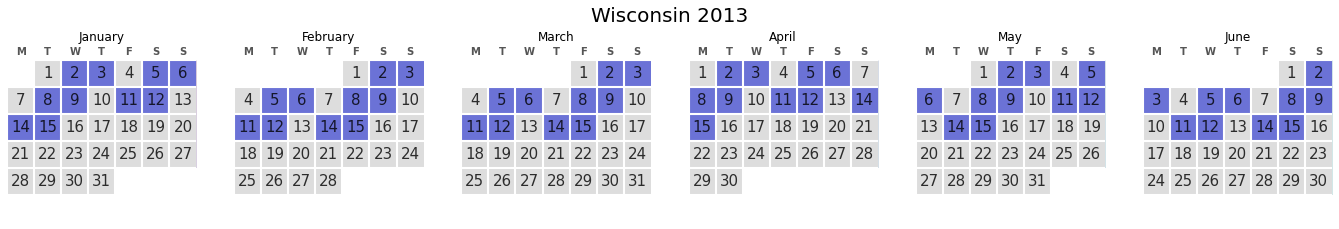

In [30]:
CA = cale4.date[cale4.snap_CA == 1].values
TX = cale4.date[cale4.snap_TX == 1].values
WI = cale4.date[cale4.snap_WI == 1].values
df = generate_data()
day_nums, day_vals = split_months(df,2013)
create_year_calendar(day_nums, day_vals,CA,'California')
create_year_calendar(day_nums, day_vals,TX,'Texas')
create_year_calendar(day_nums, day_vals,WI,'Wisconsin')


# **17.Item prices distributions of different departments of three states**

In [31]:
A=prices.groupby([prices.store_id.str.slice(0,-2),prices.item_id.str.slice(0,-4)])
B = []
D=[]
for name, group in A:
    B.append(name)
    D.append(group)
prices

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26
...,...,...,...,...
6841116,WI_3,FOODS_3_827,11617,1.00
6841117,WI_3,FOODS_3_827,11618,1.00
6841118,WI_3,FOODS_3_827,11619,1.00
6841119,WI_3,FOODS_3_827,11620,1.00


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parame

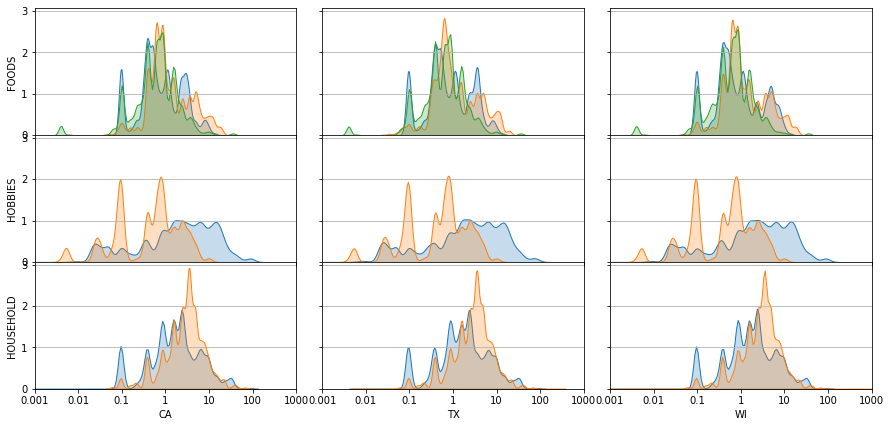

In [32]:
#import seaborn as sns
fig, ax = plt.subplots(3,3,sharey=True,sharex=True, figsize=(15,7))
k=0
for j in range(3):
    for i in range(0,1):
        sns.kdeplot(np.log10(A.get_group(B[k])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+1])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+2])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'), ylabel ="FOODS")
    for i in range(1,2):
        sns.kdeplot(np.log10(A.get_group(B[k+3])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+4])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'),ylabel = "HOBBIES")
    for i in range(2,3):
        sns.kdeplot(np.log10(A.get_group(B[k+5])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        sns.kdeplot(np.log10(A.get_group(B[k+6])['sell_price']),legend=False,bw=0.1,shade=True,ax=ax[i,j])
        ax[i,j].grid(b=True,axis='y')
        ax[i,j].set(xlabel = 'CA' if j==0 else('TX' if j==1 else'WI'),ylabel ="HOUSEHOLD")
    k=k+7
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
fig.subplots_adjust( hspace = 0.0,wspace=0.1)
plt.show()

# **18.Item prices distributions of different departments per year**

In [33]:
A=prices.groupby([prices.item_id.str.slice(0,-4),prices.wm_yr_wk//100 + 1900])['sell_price']
n = []
for name,group in A:
    n.append(name)
    
    

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parameters and update your code.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.1 for `bw_method`, but please see the docs for the new parame

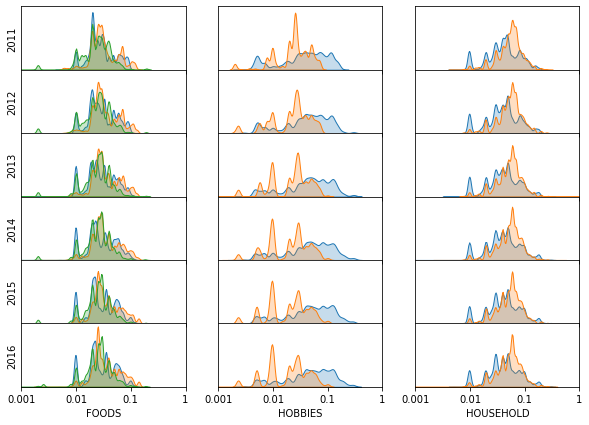

In [34]:
import seaborn as sns
fig, ax = plt.subplots(6,3,sharey=True,sharex=True, figsize=(10,7))

for i in n:
    j = 0 if i[0][:-2]=='FOODS' else (1 if i[0][:-2]=='HOBBIES' else 2)
    k = i[1] - 2011
    sns.kdeplot(np.log10(A.get_group(i)),legend=False,bw=0.1,shade=True,ax=ax[k,j])
    ax[k,j].set(xlabel = i[0][:-2], ylabel =k+2011)
fig.canvas.draw()
loc,labels = plt.xticks()
for ax in ax.flat:
    ax.label_outer()
    ax.set_xlim(-1,2)
    ax.set_xticklabels([10 ** int(i.get_text().replace(u'\u2212', '-')) for i in labels])
plt.yticks([], [])
fig.subplots_adjust( hspace = 0.0,wspace=0.2)
plt.show()

# **19.Sales per category during Event and Non-Event days**

In [35]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

for i in c:
    event_dates.remove(i)
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]


In [36]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = event_sales.groupby(['cat_id']).sum()
ne = nevent_sales.groupby(['cat_id']).sum()
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)


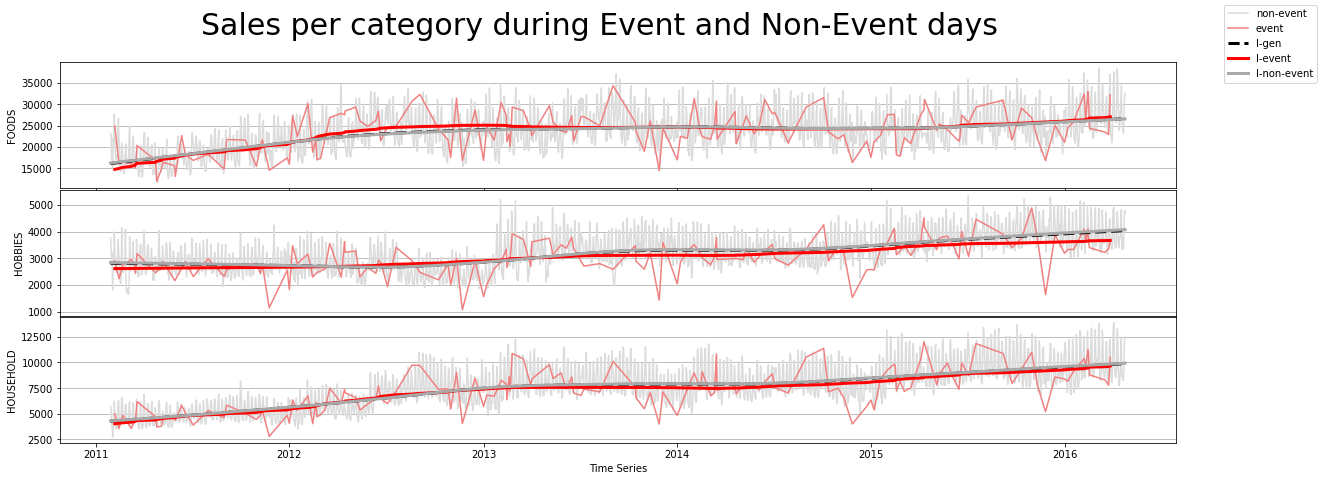

In [37]:
#viết lại
fig, ax = plt.subplots(3,1, figsize=(20,7))
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='lightcoral',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='red',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')    
    ax[j].set(xlabel ='Time Series'  ,ylabel = t.index[j])

fig.subplots_adjust( hspace = 0.01,wspace=0.0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())
plt.suptitle('Sales per category during Event and Non-Event days', fontsize=30)
plt.show()


In [38]:
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])

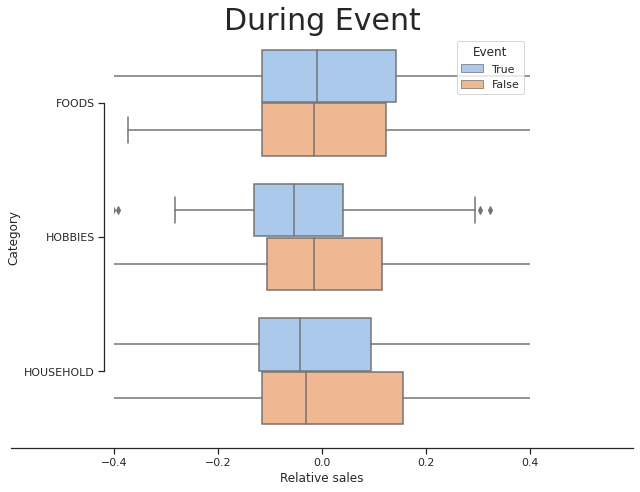

In [39]:
#viết lại
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize = (10,7))
a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 
sns.despine(offset=10, trim=True)
a.set_xlim(-0.4, 0.4)
plt.title('During Event', fontsize=30)
plt.xlabel('Relative sales')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

In [40]:
N3 = []
means = []
t = F.groupby(['cat_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date']]

for i in c:
    event_dates = event_dates[event_dates['date'] != i]


s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])

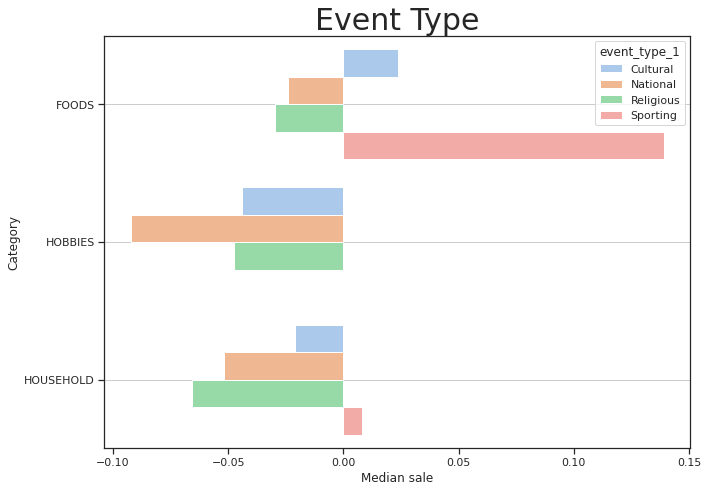

In [41]:
#viết lại
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize = (10,7))
a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
a.grid(b=True,axis='y')
a.set(xlabel="Median sales",ylabel='')
plt.title('Event Type', fontsize=30)
plt.xlabel('Median sale')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

# **20.Sales in different states during Event and Non-event days**

In [42]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
event_dates = cale4[pd.notnull(cale4['event_name_1'])]['date'] 
event_dates = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates.values]

for i in c:
    event_dates.remove(i)
event_sales = F[['id','dept_id','cat_id', 'store_id', 'state_id']+event_dates[:-8]]
nevent_sales = F[F.drop(columns=event_dates[:-8]).columns]

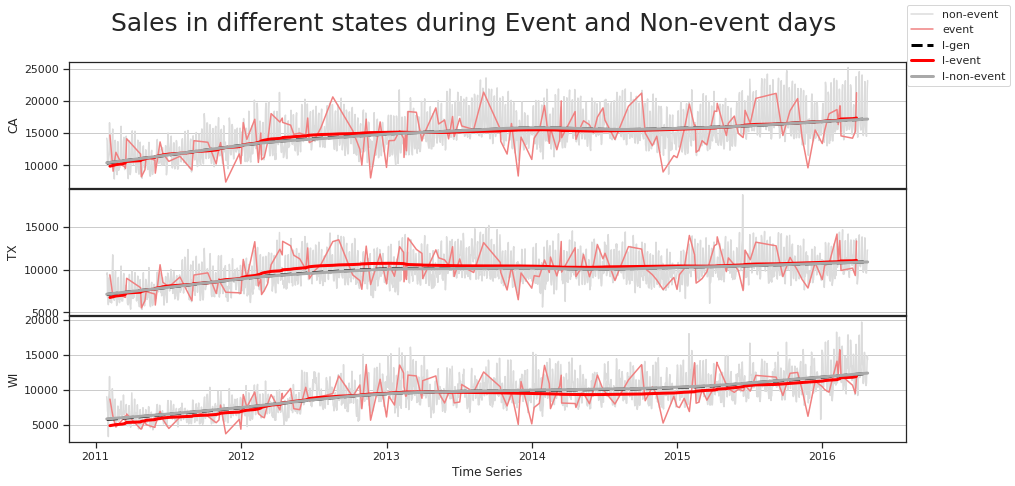

In [43]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = event_sales.groupby(['state_id']).sum()
ne = nevent_sales.groupby(['state_id']).sum()
t = F.groupby(['state_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e.iloc[i,:].values, range(e.shape[1]),frac=0.4)
    n2 = lowess(ne.iloc[i,:].values, range(ne.shape[1]),frac=0.4)
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.4)
    L1.append(n1[:,1])
    L2.append(n2[:,1])
    L3.append(n3[:,1])
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)
L1 = pd.DataFrame(L1,columns = e.columns)
L2 = pd.DataFrame(L2,columns = ne.columns)
L3 = pd.DataFrame(L3,columns = t.columns)
fig, ax = plt.subplots(3,1, figsize=(15,7))
for j in range(3):
    ax[j].plot(ne.iloc[j,:] ,color='gainsboro', label = 'non-event')
    ax[j].plot(e.iloc[j,:] ,color='lightcoral',label = 'event') 
    ax[j].plot(L3.iloc[j,:] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1.iloc[j,:] ,color='red',label = 'l-event',linewidth=3)   
    ax[j].plot(L2.iloc[j,:] ,color = 'darkgray',label = 'l-non-event',linewidth=3) 
    ax[j].grid(b=True,axis='y')    
    ax[j].set(xlabel ='Time Series'  ,ylabel = t.index[j])

fig.subplots_adjust( hspace = 0.01,wspace=0.0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys())
plt.suptitle('Sales in different states during Event and Non-event days', fontsize=25)
plt.show()


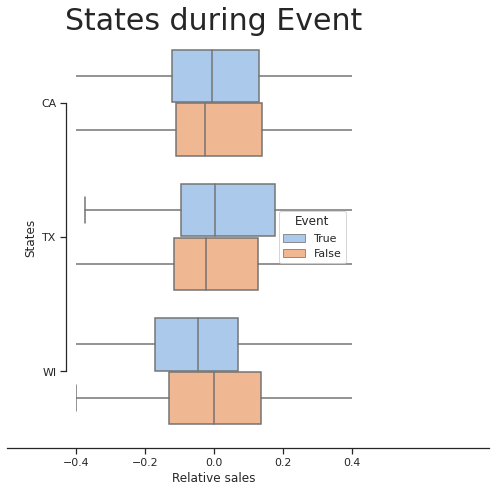

In [44]:
N1 = N3[event_dates[:-8]].T.assign(Event='True')
N2 = N3[N3.drop(columns=event_dates[:-8]).columns].T.assign(Event='False')
cdf = pd.concat([N1,N2])
mdf = pd.melt(cdf, id_vars=['Event'], var_name=['Letter'])

#viết lại
#viết lại
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize = (10,7))
a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 
sns.despine(offset=10, trim=True)
a.set_xlim(-0.4, 0.4)
plt.title('States during Event', fontsize=30)
plt.xlabel('Relative sales')
plt.ylabel('States')
plt.tight_layout()
plt.show()

#code cũ
# a = sns.boxplot(x="value", y="Letter", hue="Event", data=mdf, orient='h') 
# a.set(xlabel="Relative sales",ylabel='')
# a.set_xlim(-0.4, 0.4)
# plt.show()

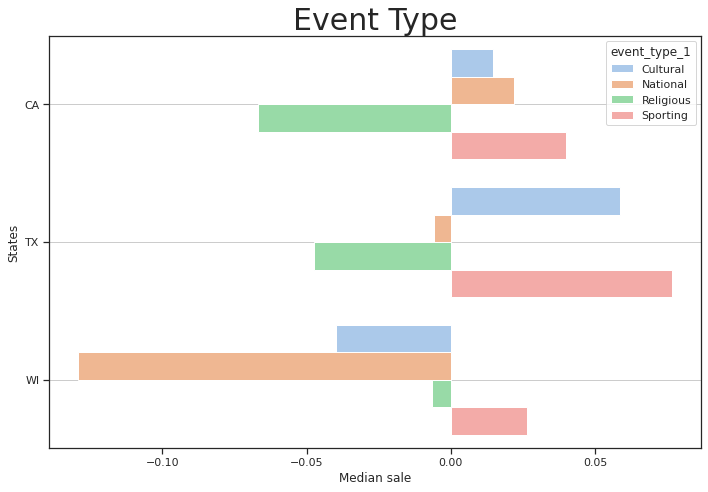

In [45]:

N3 = []
means = []
t = F.groupby(['state_id']).sum()
means = t.mean(axis=1)
for i in range(3):
    n3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n3 = (t.iloc[i,:] - n3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

event_dates = cale4[pd.notnull(cale4['event_name_1'])][['date','event_type_1']] 
event_dates['date'] = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in event_dates['date'].values]
for i in c:
    event_dates = event_dates[event_dates['date'] != i]
event_dates = event_dates.iloc[:-8,:]

s = N3.T
s.reset_index(drop=False, inplace=True)
s.rename(columns = {'index':'date'},inplace=True)
s = pd.merge(left=event_dates, right=s, how='left', left_on='date', right_on='date')

s = s.groupby(['event_type_1']).median()
s.reset_index(drop=False, inplace=True)
s = s.melt(id_vars=['event_type_1'], value_vars=s.columns[1:])

#viết lại
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize = (10,7))
a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
a.grid(b=True,axis='y')
a.set(xlabel="Median sales",ylabel='')
plt.title('Event Type', fontsize=30)
plt.xlabel('Median sale')
plt.ylabel('States')
plt.tight_layout()
plt.show()



# #code cũ
# a=sns.barplot(x=s.value,y=s.variable,hue=s.event_type_1)
# a.grid(b=True,axis='y')
# a.set(xlabel="Median sales",ylabel='')

# **21.Sales per state on SNAP vs Non-SNAP days**

In [46]:
c = [datetime.date(2011, 12, 25),datetime.date(2012, 12, 25), datetime.date(2013, 12, 25),datetime.date(2014, 12, 25),datetime.date(2015, 12, 25)]
F = sale2.drop(labels=c,axis=1)
F = F.groupby(['state_id']).sum()
CA_snap = cale4.date[cale4.snap_CA == 1].values
TX_snap = cale4.date[cale4.snap_TX == 1].values
WI_snap = cale4.date[cale4.snap_WI == 1].values
CA_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in CA_snap]
TX_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in TX_snap]
WI_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in WI_snap]

CA_snap_sales = F[CA_snap[:-20]].iloc[0,:]
TX_snap_sales = F[TX_snap[:-20]].iloc[1,:]
WI_snap_sales = F[WI_snap[:-20]].iloc[2,:]

CA_nsnap_sales = F[F.drop(columns=CA_snap[:-20]).columns].iloc[0,:]
TX_nsnap_sales = F[F.drop(columns=TX_snap[:-20]).columns].iloc[1,:]
WI_nsnap_sales = F[F.drop(columns=WI_snap[:-20]).columns].iloc[2,:]


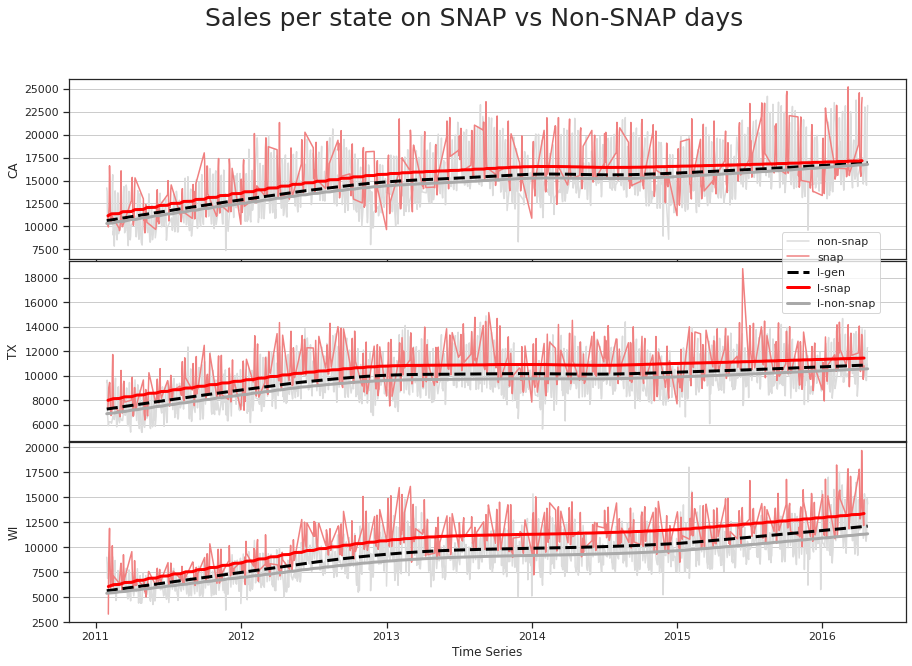

In [47]:
N3 = []
L1 = []
L2 = []
L3 = []
means = []
e = [CA_snap_sales,TX_snap_sales,WI_snap_sales]
ne = [CA_nsnap_sales,TX_nsnap_sales,WI_nsnap_sales]
t = F
means = t.mean(axis=1)
for i in range(3):
    n1 = lowess(e[i].values, range(len(e[i])),frac=0.5)
    n2 = lowess(ne[i].values, range(len(ne[i])),frac=0.5)
    nn3 = lowess(t.iloc[i,:].values, range(t.shape[1]),frac=0.5)
    n1 = pd.Series(n1[:,1],e[i].index)
    n2 = pd.Series(n2[:,1],ne[i].index)
    n3 = pd.Series(nn3[:,1],t.columns)
    L1.append(n1)
    L2.append(n2)
    L3.append(n3)
    n3 = (t.iloc[i,:] - nn3[:,1]) /(means[i])
    N3.append(n3)
N3 = pd.DataFrame(N3,columns = t.columns)

#viết lại
fig, ax = plt.subplots(3,1, figsize=(15,10))
for j in range(3):
    ax[j].plot(ne[j] ,color='gainsboro', label = 'non-snap')
    ax[j].plot(e[j],color='lightcoral',label = 'snap') 
    ax[j].plot(L3[j] ,color = 'black', linestyle= 'dashed',label = 'l-gen',linewidth=3) 
    ax[j].plot(L1[j] ,color='red',label = 'l-snap',linewidth=3)   
    ax[j].plot(L2[j] ,color = 'darkgray',label = 'l-non-snap',linewidth=3) 
    ax[j].grid(b=True,axis='y')  
    ax[j].set(xlabel ="Time Series" ,ylabel =  t.index[j])

fig.subplots_adjust( hspace = 0.01,wspace=0.0)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(),bbox_to_anchor=(0.82,0.61))
plt.suptitle('Sales per state on SNAP vs Non-SNAP days', fontsize=25)
plt.show()


# **22.Daily Sales percentage on SNAP and Non-SNAP days**

In [48]:
perc = []
for i in range(3):
    a = e[i].sum()/(1908/3)
    b = ne[i].sum()/(2*1908/3)
    perc.append([a*100/(a+b), b*100/(a+b)])

perc = pd.DataFrame(perc,index=["CA","TX","WI"],columns=["SNAP","NON_SNAP"])
perc.reset_index(drop=False, inplace=True)
s = perc.melt(id_vars=['index'], value_vars=perc.columns[1:])
s = s.sort_values(by='index',ignore_index=True)

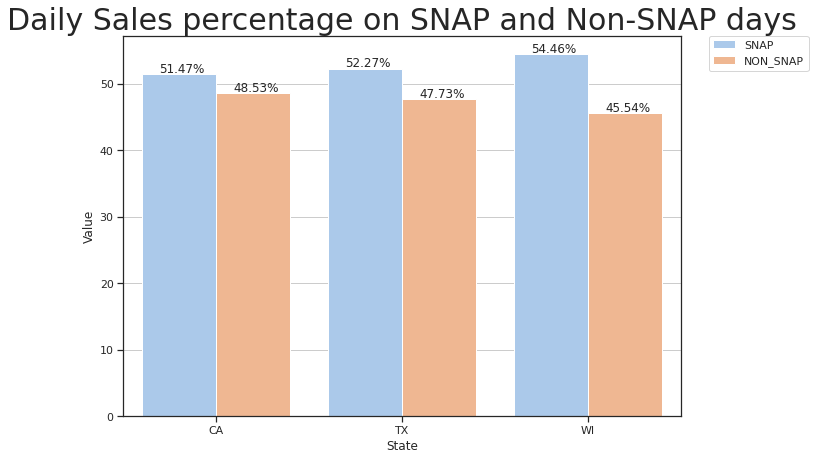

In [49]:
#viết lại
sns.set_theme(style="ticks", palette="pastel")
fig, ax = plt.subplots(figsize = (10,7))
a=sns.barplot(y=s.value,hue=s.variable,x=s['index'])
a.grid(b=True,axis='y')
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
            xytext=(-20,5), textcoords='offset points', ha="left", va="center")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Daily Sales percentage on SNAP and Non-SNAP days', fontsize=30)
plt.xlabel('State')
plt.ylabel('Value')
plt.show()

#code cũ
# ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
# ax.legend(loc = 'lower right')
# for p in ax.patches:
#     ax.annotate("%.2f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
#             xytext=(-20,5), textcoords='offset points', ha="left", va="center")


# **23.Daily Sales percentage on SNAP and Non-SNAP days per category**

In [50]:
F  = sale2.groupby(['state_id','cat_id']).sum()
F.reset_index(drop=False, inplace=True)
l = [CA_snap[:-20],TX_snap[:-20],WI_snap[:-20]]

t = []
for i in range(9):
    t.append((F['state_id'][i],F['cat_id'][i]))
    
a=[]
b = []
perc = []
for i in range(9):
    a.append(F[l[i//3]].loc[i,:].sum()/(1908/3))
    b.append(F[F.drop(columns=l[i//3]).columns].iloc[i,3:].sum()/(2*1908/3))
    perc.append([a[i]*100/(a[i]+b[i]), b[i]*100/(a[i]+b[i])])
perc = pd.DataFrame(perc,index=t,columns=["SNAP","NON_SNAP"])
perc.reset_index(drop=False, inplace=True)
s = perc.melt(id_vars=['index'], value_vars=perc.columns[1:])
s = s.sort_values(by='index',ignore_index=True)

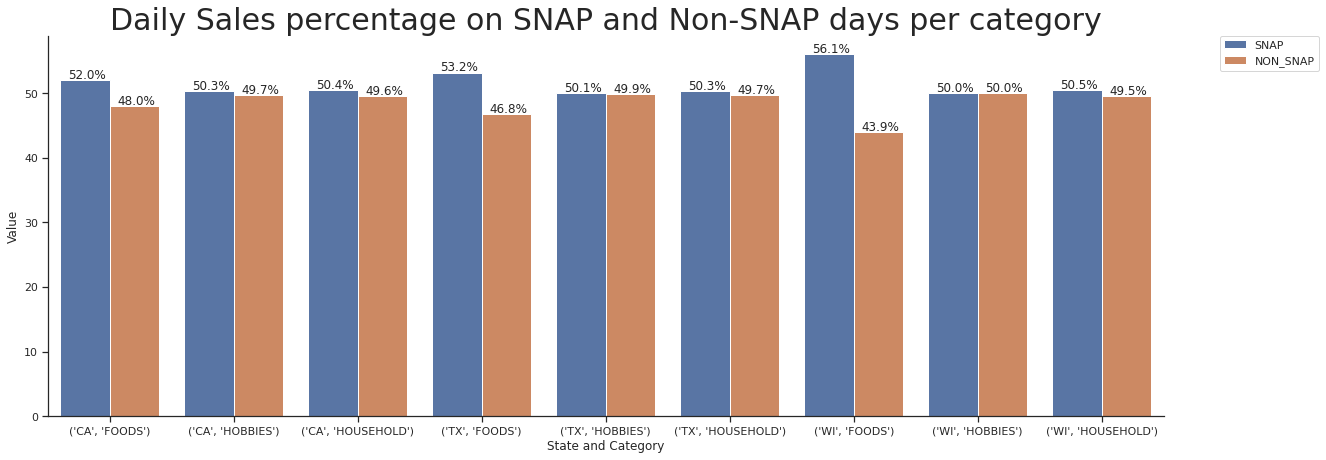

In [51]:
#viết lại
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

fig, ax = plt.subplots(figsize=(20,7))
ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
for p in ax.patches:
    ax.annotate("%.1f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
            xytext=(-17,5), textcoords='offset points', ha="left", va="center")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.title('Daily Sales percentage on SNAP and Non-SNAP days per category', fontsize=30)
plt.xlabel('State and Category')
plt.ylabel('Value')
plt.show()


# fig, ax = plt.subplots(figsize=(15,4))
# ax = sns.barplot(y=s.value,hue=s.variable,x=s['index'])
# ax.legend(loc = 'lower right')

# for p in ax.patches:
#     ax.annotate("%.1f" % p.get_height()+'%', xy=(p.get_x()+p.get_width()/2,p.get_height()),
#             xytext=(-17,5), textcoords='offset points', ha="left", va="center")


# **24.SNAP impact on Food sales in CA**
Relative sales on SNAP days - Relative sales on other days
Red -- high SNAP effect and Blue -- low SNAP effect

In [52]:
z = F.drop(labels=c,axis=1).iloc[0,2:]
n1 = lowess(z.values, range(1908),frac=0.5)
rel_sales = (z.values - n1[:,1]) / z.mean()
rel_sales = pd.Series(rel_sales,z.index)

rel_sales1 = rel_sales[CA_snap[:-20]]
rel_sales2 = rel_sales.drop(labels = CA_snap[:-20])

a = rel_sales1.groupby(rel_sales1.index.map(lambda x : str(x.weekday())+'-'+str(x.month))).sum()
b = rel_sales2.groupby(rel_sales2.index.map(lambda x : str(x.weekday())+'-'+str(x.month))).sum()

H = np.zeros((7,12))
for i in range(7):
    for j in range(12):
        H[i,j] = a[str(i)+'-'+str(j+1)] - b[str(i)+'-'+str(j+1)]

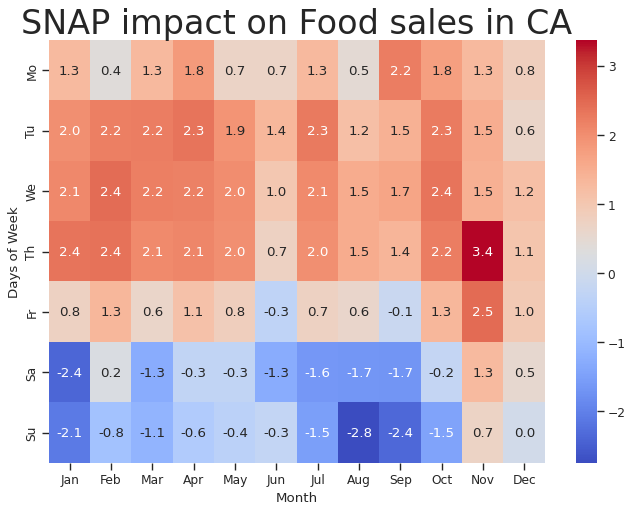

In [53]:
#viết lại
dayofweek=['Mo', 'Tu', 'We', 'Th', 'Fr','Sa','Su' ]
monthofyear=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(None, figsize=(10, 7), dpi=80, facecolor='w', edgecolor='k')
ax = sns.heatmap(H, annot=True,fmt=".1f",cmap='coolwarm',\
                 xticklabels=monthofyear,\
                 yticklabels=dayofweek)
plt.title('SNAP impact on Food sales in CA', fontsize=30)
plt.xlabel('Month')
plt.ylabel('Days of Week')
plt.show()

# #code cũ
# plt.figure(None, figsize=(7, 5), dpi=80, facecolor='w', edgecolor='k')
# ax = sns.heatmap(H,cmap='coolwarm',xticklabels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
#                  yticklabels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday' ])
# plt.show()

# **25.Sales for Three random items in mid of 2015 with Black points as Events and Gray Background representing SNAP days**

In [54]:
x = sale2[sale2['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].loc[:,datetime.date(2015,5,1):datetime.date(2015,10,1)]
x

,2015-05-01,2015-05-02,2015-05-03,2015-05-04,2015-05-05,2015-05-06,2015-05-07,2015-05-08,2015-05-09,2015-05-10,...,2015-09-22,2015-09-23,2015-09-24,2015-09-25,2015-09-26,2015-09-27,2015-09-28,2015-09-29,2015-09-30,2015-10-01
1919,1,0,0,1,3,2,1,0,3,3,...,0,0,0,0,0,2,1,0,0,0
16412,0,1,0,0,1,0,0,0,1,0,...,0,0,0,3,0,0,0,1,1,0
27780,3,7,0,2,0,4,2,2,0,2,...,0,0,3,6,1,0,0,3,2,3


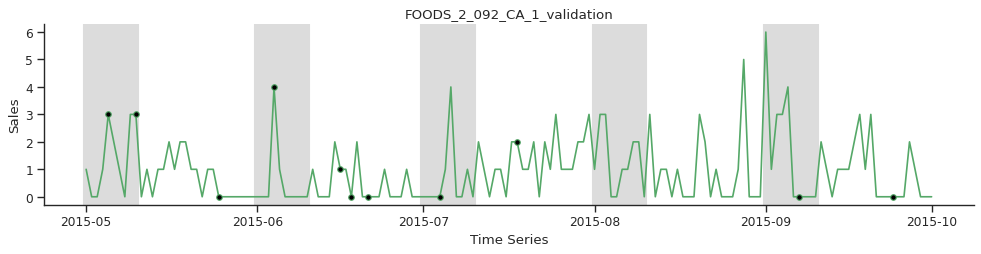

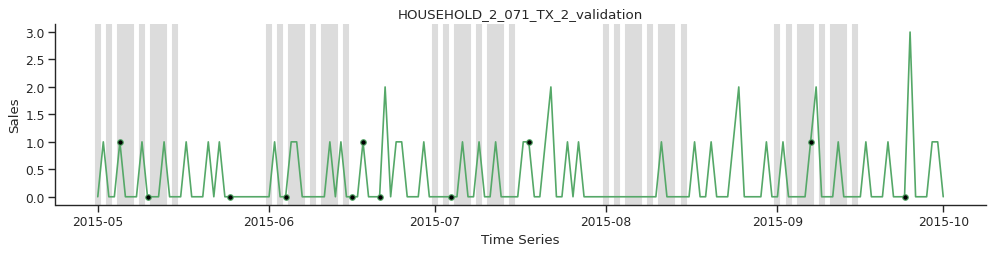

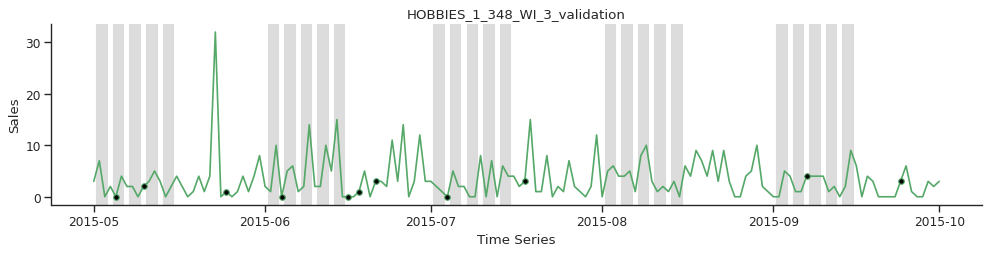

In [55]:
# Viết lại
def ve_by_item(df,items,snap):
  v = event_dates[event_dates['date'].isin([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)])]['date']
  d = []
  for i in range(len(v)):
      d.append(x.columns.get_loc(v.values[i]))   
  c = list(set(snap) & set([datetime.date(2015,5,1) + datetime.timedelta(days=x) for x in range(153)]))
  e = []
  for i in range(len(c)):
      e.append(x.columns.get_loc(c[i]))
      
  plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
  for i in range(len(c)):
      plt.axvline(c[i],color='gainsboro',linewidth=5.5)
  plt.plot(df, '-gd', markevery = d,markerfacecolor='black',marker='.',markersize=10)
  plt.title(items)
  plt.ylabel("Sales")
  plt.xlabel("Time Series")
  plt.show()


CA_snap = cale4.date[cale4.snap_CA == 1].values
TX_snap = cale4.date[cale4.snap_TX == 1].values
WI_snap = cale4.date[cale4.snap_WI == 1].values
CA_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in CA_snap]
TX_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in TX_snap]
WI_snap = [datetime.datetime.strptime(i, '%Y-%m-%d').date() for i in WI_snap]


ve_by_item(x.iloc[0,:],"FOODS_2_092_CA_1_validation",CA_snap)
ve_by_item(x.iloc[1,:],"HOUSEHOLD_2_071_TX_2_validation",TX_snap)
ve_by_item(x.iloc[2,:],"HOBBIES_1_348_WI_3_validation",WI_snap)



# **27.Sales of 3 random items with price change in background**

In [56]:
x = sale2[sale2['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].iloc[:,0:]
x

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
1919,FOODS_2_092_CA_1_validation,FOODS_2_092,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
16412,HOUSEHOLD_2_071_TX_2_validation,HOUSEHOLD_2_071,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,3,0,0,0,...,1,1,1,0,0,0,0,0,3,0
27780,HOBBIES_1_348_WI_3_validation,HOBBIES_1_348,HOBBIES_1,HOBBIES,WI_3,WI,7,0,0,3,...,4,10,2,1,1,2,1,0,1,0


In [57]:
#z = prices[(prices['store_id']=='TX_2') & (prices['item_id']=='HOUSEHOLD_2_071')]
z = prices[(prices['store_id']=='CA_1') & (prices['item_id']=='FOODS_2_092')]
z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
u = z.sell_price.unique()
u=u[~np.isnan(u)]
u

array([4.25, 3.98, 3.48, 3.33, 3.47, 3.68, 3.5 , 3.74])

In [58]:
# viết lại
def ve_san_pham_abc(df,store_id,item_id,umax):  
  z = prices[(prices['store_id']==store_id) & (prices['item_id']==item_id)]
  z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
  z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
  u = z.sell_price.unique()
  y = [] 
  u=u[~np.isnan(u)]
  for i in u:
      y.append(z.groupby(['sell_price']).get_group(i)['date'].values)
      
  plt.figure(None, figsize=(15,3), dpi=80, facecolor='w', edgecolor='k')
  for i in range(len(y)):
      for j in range(len(y[i])):
          plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+umax), cmap='YlGn').to_rgba(u[i]))
  plt.plot(df,color='black')
  plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+umax), cmap='YlGn'),label='Price [$]')
  plt.title(item_id)
  plt.ylabel("Sales")
  plt.show()


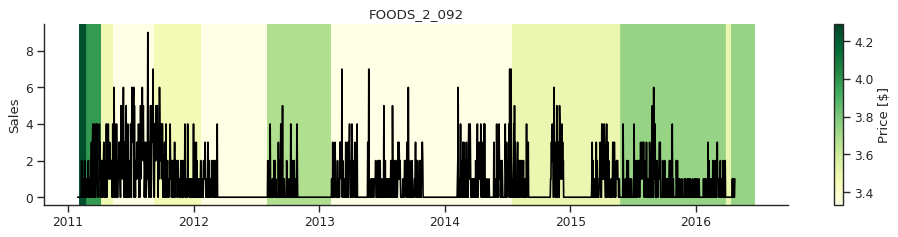

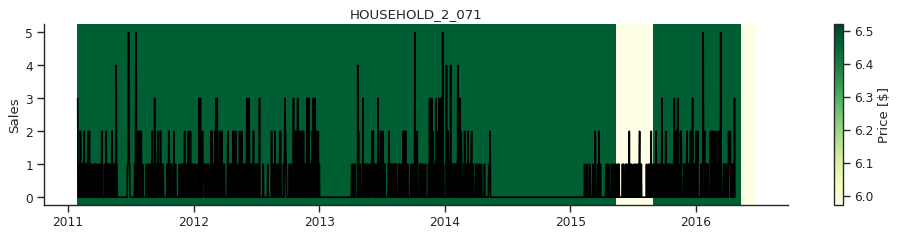

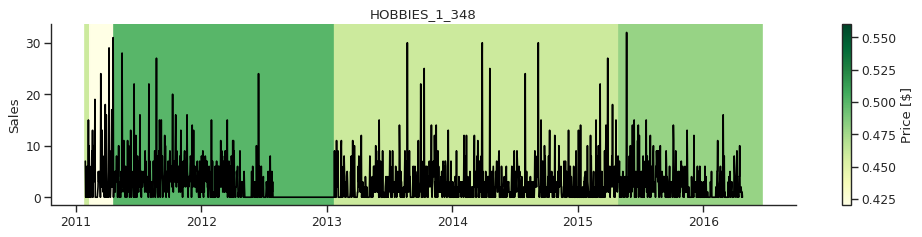

In [62]:
i=0
umax=0.04
for index, row in x.iterrows():    
    ve_san_pham_abc(x.iloc[i,6:],row['store_id'],row['item_id'],umax)
    i=i+1
    umax=0.04+(i*0.01)


In [63]:
# z = prices[(prices['store_id']=='CA_1') & (prices['item_id']=='FOODS_2_092')]
# z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
# z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
# u = z.sell_price.unique()
# y = []
# u = u[1:]
# for i in u:
#     y.append(z.groupby(['sell_price']).get_group(i)['date'].values)
    
# plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(len(y)):
#     for j in range(len(y[i])):
#         plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.04), cmap='YlGn').to_rgba(u[i]))       
# plt.plot(x.iloc[0,6:],color='black')
# plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.04), cmap='YlGn'),label='Price [$]')
# plt.title("FOODS_2_092_CA_1")
# plt.ylabel("Sales")
# plt.show()

In [64]:
# z = prices[(prices['store_id']=='TX_2') & (prices['item_id']=='HOUSEHOLD_2_071')]
# z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
# z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
# u = z.sell_price.unique()
# y = []
# for i in u:
#     y.append(z.groupby(['sell_price']).get_group(i)['date'].values)

# plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(len(y)):
#     for j in range(len(y[i])):
#         plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.05), cmap='YlGn').to_rgba(u[i]))
# plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.05), cmap='YlGn'),label='Price [$]')
# plt.plot(x.iloc[1,6:],color='black')
# plt.title("HOUSEHOLD_2_071")
# plt.ylabel("Sales")
# plt.show()

In [65]:
# z = prices[(prices['store_id']=='WI_3') & (prices['item_id']=='HOBBIES_1_348')]
# z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
# z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
# u = z.sell_price.unique()
# y = []
# for i in u:
#     y.append(z.groupby(['sell_price']).get_group(i)['date'].values)

# plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(len(y)):
#     for j in range(len(y[i])):
#         plt.axvline(y[i][j],color=matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.07), cmap='YlGn').to_rgba(u[i]))
# plt.colorbar(matplotlib.cm.ScalarMappable(matplotlib.colors.Normalize(vmin=u.min(), vmax=u.max()+0.07), cmap='YlGn'),label='Price [$]')
# plt.plot(x.iloc[2,6:],color='black')
# plt.title("HOBBIES_1_348_WI_3")
# plt.ylabel("Sales")
# plt.show()

# **28.Sales of 3 items with Gray background representing SNAP days, Black dots represting Events and Yellow line representing Scaled Prices**

In [66]:
x = sale2[sale2['id'].isin(["FOODS_2_092_CA_1_validation", "HOUSEHOLD_2_071_TX_2_validation", "HOBBIES_1_348_WI_3_validation"])].iloc[:,0:]
x

,id,item_id,dept_id,cat_id,store_id,state_id,2011-01-29,2011-01-30,2011-01-31,2011-02-01,...,2016-04-15,2016-04-16,2016-04-17,2016-04-18,2016-04-19,2016-04-20,2016-04-21,2016-04-22,2016-04-23,2016-04-24
1919,FOODS_2_092_CA_1_validation,FOODS_2_092,FOODS_2,FOODS,CA_1,CA,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
16412,HOUSEHOLD_2_071_TX_2_validation,HOUSEHOLD_2_071,HOUSEHOLD_2,HOUSEHOLD,TX_2,TX,3,0,0,0,...,1,1,1,0,0,0,0,0,3,0
27780,HOBBIES_1_348_WI_3_validation,HOBBIES_1_348,HOBBIES_1,HOBBIES,WI_3,WI,7,0,0,3,...,4,10,2,1,1,2,1,0,1,0


CA CA_1 FOODS_2_092


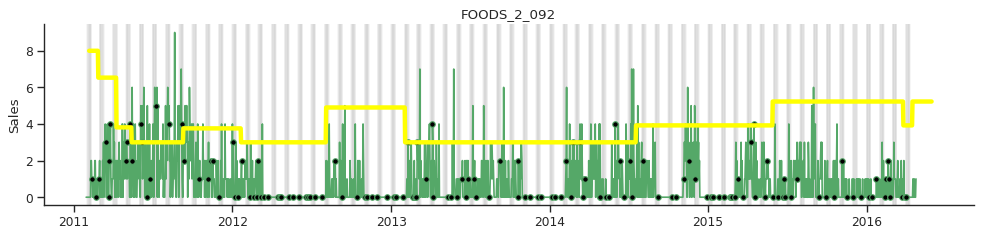

TX TX_2 HOUSEHOLD_2_071


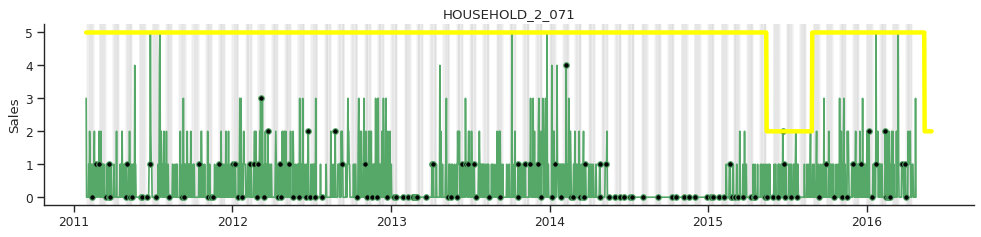

WI WI_3 HOBBIES_1_348


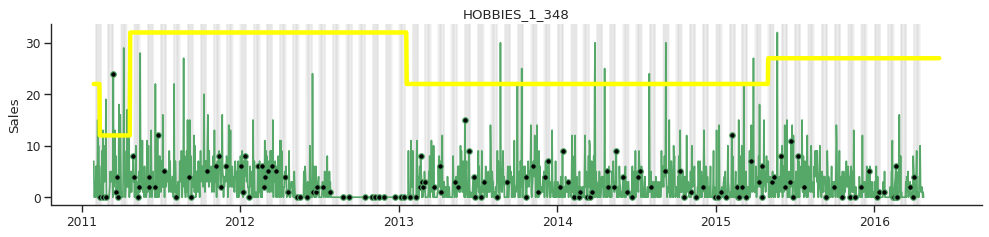

In [67]:
#viết lại
dong=0
for index,row in x.iterrows():   
    print(row['state_id'],row['store_id'],row['item_id'])
    v = event_dates['date']
    d = []
    for i in range(len(v)):
        d.append(x.columns.get_loc(v.values[i]))   
    if row['state_id'] =='CA':
        c = CA_snap[:-20]
    elif row['state_id'] =='TX':
        c = TX_snap[:-20]
    else:
        c = WI_snap[:-20]

    e = []
    for i in range(len(c)):
        e.append(x.columns.get_loc(c[i]))
        
    z = prices[(prices['store_id']==row['store_id']) & (prices['item_id']==row['item_id'])]
    z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
    z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
    if row['state_id'] =='CA': 
        z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (8-3)) / (z.sell_price.max() - z.sell_price.min())) + 3)
    elif row['state_id'] =='TX': 
        z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (5-2)) / (z.sell_price.max() - z.sell_price.min())) + 2)
    else:
        z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (32-12)) / (z.sell_price.max() - z.sell_price.min())) + 12)
    z = z.iloc[:-20,:]
    z = z.set_index('date')

    plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
    for i in range(len(c)):
        plt.axvline(c[i],color='dimgray',linewidth=0.1)
    plt.plot(x.iloc[dong,6:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
    plt.plot(z.sell_price,color='yellow',linewidth=4)
    plt.title(row['item_id'])
    plt.ylabel("Sales")
    plt.show()
    dong=dong+1







In [68]:
# v = event_dates['date']
# d = []
# for i in range(len(v)):
#     d.append(x.columns.get_loc(v.values[i]))   
# c = CA_snap[:-20]
# e = []
# for i in range(len(c)):
#     e.append(x.columns.get_loc(c[i]))
    
# z = prices[(prices['store_id']=='CA_1') & (prices['item_id']=='FOODS_2_092')]
# z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
# z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
# z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (8-3)) / (z.sell_price.max() - z.sell_price.min())) + 3)
# z = z.iloc[:-20,:]
# z = z.set_index('date')


# plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(len(c)):
#     plt.axvline(c[i],color='dimgray',linewidth=0.1)
# plt.plot(x.iloc[0,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
# plt.plot(z.sell_price,color='yellow',linewidth=4)
# plt.title("FOODS_2_092_CA_1")
# plt.ylabel("Sales")
# plt.show()

In [69]:
# v = event_dates['date']
# d = []
# for i in range(len(v)):
#     d.append(x.columns.get_loc(v.values[i]))   
# c = TX_snap[:-20]
# e = []
# for i in range(len(c)):
#     e.append(x.columns.get_loc(c[i]))
    
# z = prices[(prices['store_id']=='TX_2') & (prices['item_id']=='HOUSEHOLD_2_071')]
# z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
# z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
# z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (5-2)) / (z.sell_price.max() - z.sell_price.min())) + 2)
# z = z.iloc[:-20,:]
# z = z.set_index('date')


# plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(len(c)):
#     plt.axvline(c[i],color='dimgray',linewidth=0.1)
# plt.plot(x.iloc[1,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
# plt.plot(z.sell_price,color='yellow',linewidth=4)
# plt.title("HOUSEHOLD_2_071_TX_2")
# plt.ylabel("Sales")
# plt.show()

In [70]:
# v = event_dates['date']
# d = []
# for i in range(len(v)):
#     d.append(x.columns.get_loc(v.values[i]))   
# c = WI_snap[:-20]
# e = []
# for i in range(len(c)):
#     e.append(x.columns.get_loc(c[i]))
    
# z = prices[(prices['store_id']=='WI_3') & (prices['item_id']=='HOBBIES_1_348')]
# z=cale4[['date','wm_yr_wk']].merge(z[['sell_price','wm_yr_wk']], how='left',on='wm_yr_wk')
# z['date']=z['date'].apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d').date())
# z['sell_price'] = z['sell_price'].apply(lambda x : (((x - z.sell_price.min()) * (32-12)) / (z.sell_price.max() - z.sell_price.min())) + 12)
# z = z.iloc[:-20,:]
# z = z.set_index('date')


# plt.figure(None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
# for i in range(len(c)):
#     plt.axvline(c[i],color='dimgray',linewidth=0.1)
# plt.plot(x.iloc[2,:], '-gd', markevery = d, markerfacecolor='black',marker='.',markersize=10)
# plt.plot(z.sell_price,color='yellow',linewidth=4)
# plt.title("HOBBIES_1_348_WI_3")
# plt.ylabel("Sales")
# plt.show()